# Sheet 08

Welcome to Sheet 08

## Task 8.1

- a) Recreate the circuit for $QFT_{16}$ in a simulator of your choice and check the result for the input |0111⟩.

Here is the $DFT$:

$$DFT_N=\begin{pmatrix}1&1&1&1&\ldots&1\\1&\omega_N&\omega_N^2&\omega_N^3&\ldots&\omega_N^{(N-1)}\\1&\omega_N^2&\omega_N^4&\omega_N^6&\ldots&\omega_N^{2(N-1)}\\1&\omega_N^3&\omega_N^6&\omega_N^9&\ldots&\omega_N^{3(N-1)}\\\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\1&\omega_N^{(N-1)}&\omega_N^{2(N-1)}&\omega_N^{3(N-1)}&\ldots&\omega_N^{(N-1)(N-1)}\end{pmatrix}$$

Here is it equivalent in $QFT$:

$$QFT_N=\frac1{\sqrt{N}}\begin{pmatrix}1&1&1&1&\ldots&1\\1&\omega_N&\omega_N^2&\omega_N^3&\ldots&\omega_N^{(N-1)}\\1&\omega_N^2&\omega_N^4&\omega_N^6&\ldots&\omega_N^{2(N-1)}\\1&\omega_N^3&\omega_N^6&\omega_N^9&\ldots&\omega_N^{3(N-1)}\\\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\1&\omega_N^{(N-1)}&\omega_N^{2(N-1)}&\omega_N^{3(N-1)}&\ldots&\omega_N^{(N-1)(N-1)}\end{pmatrix}$$


We have the following formula in general:

$$
QFT_N=\frac1{\sqrt{N}}\left(\left(\left|0\right\rangle+\omega_2^j\left|1\right\rangle\right)\otimes\left(\left|0\right\rangle+\omega_4^j\left|1\right\rangle\right)\otimes\ldots\otimes\left(\left|0\right\rangle+\omega_N^j\left|1\right\rangle\right)\right)
$$

Thus, for $QFT_{16}$:

$$
QFT_{16}=\frac1{\sqrt{16}}\left(\left(\left|0\right\rangle+\omega_2^j\left|1\right\rangle\right)\otimes\left(\left|0\right\rangle+\omega_4^j\left|1\right\rangle\right) \otimes\left(\left|0\right\rangle+\omega_{8}^j\left|1\right\rangle\right)\otimes\left(\left|0\right\rangle+\omega_{16}^j\left|1\right\rangle\right)\right)
$$

With:
$$
\begin{aligned}
&\omega_2=e^{2\pi i/2}=-1\text{,  so }\omega_2^j=(-1)^j \\
&\omega_4=e^{2\pi i/4}=i\text{,  so }\omega_4^j=i^j \\
&\omega_8=e^{2\pi i/8}=e^{\pi i/4}=\frac1{\sqrt2}(1+i)\text{,  so }\omega_8^j=(e^{\pi i/4})^j=e^{j\pi i/4} \\
&\omega_{16}=e^{2\pi i/16}=e^{\pi i/8}\text{,  so }\omega_{16}^j=e^{j\pi i/8}
\end{aligned}
$$

$$
\begin{aligned}
&QFT_{16}=\frac14\left(\left|0000\right\rangle+e^{j\pi i/8}\left|0001\right\rangle+e^{j\pi i/4}\left|0010\right\rangle+e^{j\pi i/4}e^{j\pi i/8}\left|0011\right\rangle+i^j\left|0100\right\rangle\right.\\
&\quad+i^je^{j\pi i/8}\left|0101\right\rangle+i^je^{j\pi i/4}\left|0110\right\rangle+i^je^{j\pi i/4}e^{j\pi i/8}\left|0111\right\rangle+\left(-1\right)^j\left|1000\right\rangle\\
&\quad+(-1)^je^{j\pi i/8}\left|1001\right\rangle+(-1)^je^{j\pi i/4}\left|1010\right\rangle+(-1)^je^{j\pi i/4}e^{j\pi i/8}\left|1011\right\rangle+(-1)^ji^j\left|1100\right\rangle\\
&\quad+(-1)^ji^je^{j\pi i/8}\left|1101\right\rangle+(-1)^ji^je^{j\pi i/4}\left|1110\right\rangle+(-1)^ji^je^{j\pi i/4}e^{j\pi i/8}\left|1111\right\rangle)\end{aligned}
$$


E.g. if $j=1$:
$$
\begin{aligned}
&QFT_{16}=\frac14\left(\left|0000\right\rangle+e^{\pi i/8}\left|0001\right\rangle+e^{\pi i/4}\left|0010\right\rangle+e^{\pi i/4}e^{\pi i/8}\left|0011\right\rangle+i\left|0100\right\rangle\right.\\
&\quad+ie^{\pi i/8}\left|0101\right\rangle+ie^{\pi i/4}\left|0110\right\rangle+ie^{\pi i/4}e^{\pi i/8}\left|0111\right\rangle-\left|1000\right\rangle\\
&\quad-e^{\pi i/8}\left|1001\right\rangle-e^{\pi i/4}\left|1010\right\rangle-e^{\pi i/4}e^{\pi i/8}\left|1011\right\rangle-i\left|1100\right\rangle\\
&\quad-ie^{\pi i/8}\left|1101\right\rangle-ie^{\pi i/4}\left|1110\right\rangle-ie^{\pi i/4}e^{\pi i/8}\left|1111\right\rangle)\end{aligned}
$$


if $2^n=N=16$ then the number of Qbits is $n=4$.

In [2]:
import math

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer, AerSimulator

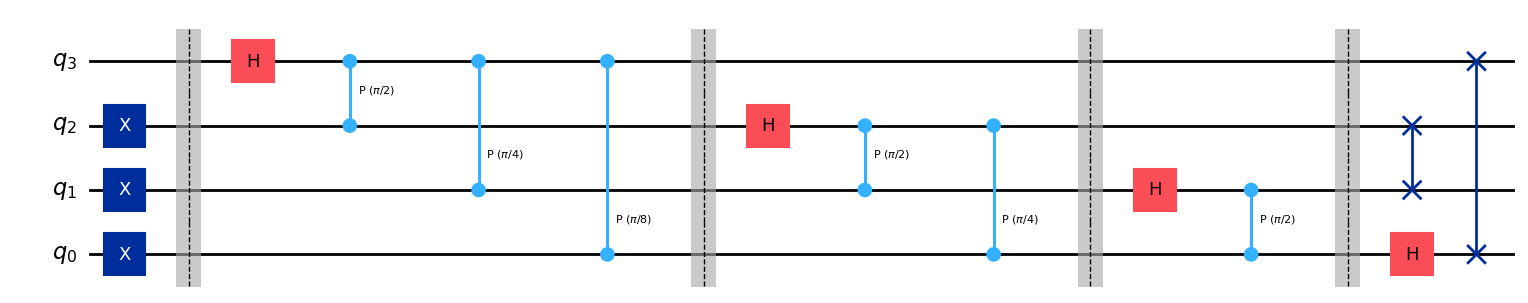

In [53]:
def qft(qc, num_qubits, iterator, offset = 0):
    for i, j in enumerate(reversed(range(0+offset, 4+offset))):
        qc.barrier()
        qc.h(j)
        for index, k in enumerate(iterator[:j-offset]):
            qc.cp((2*math.pi)/k, j, j-1-index)
    qc.swap(0+offset, 3+offset)
    qc.swap(1+offset, 2+offset)


def circuit():
    num_qubits = 4
    iterator = [2**n for n in range(2, 5)]

    qc = QuantumCircuit(num_qubits)
    qc.x(range(0, num_qubits-1))
    qft(qc, num_qubits, iterator)

    return qc

qc = circuit()

qc.draw("mpl", reverse_bits=True)

In [4]:
def display_statevector(statevector):
    statevector = np.asarray(statevector)
    num_qubits = int(np.log2(len(statevector)))
    basis_states = [f'|{i:0{num_qubits}b})' for i in range(len(statevector) )]
    print(f"{basis_states=}")
    output = ""
    for i, amplitude in enumerate(statevector):
        if np.abs(amplitude) > 1e-10:
            if output != "":
                output += " + "
            if np.abs(amplitude.real - 1) < 1e-3 and np.abs(amplitude.imag) < 1e-3:
                output += f'{basis_states [i]}'
            elif np.abs(amplitude.real) < 1e-3 and np.abs(amplitude.imag - 1) < 1e-3:
                output += f'i{basis_states[i]}'
            elif np.abs(amplitude.imag) < 1e-3:
                output += f'({amplitude.real: .3f}){basis_states[i]}'
            else:
                amplitude_str = f'({amplitude.real:.3f} {amplitude.imag:+.3f}i)'
                output += f'{amplitude_str}{basis_states [i]}'
    return output

In [5]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

display_statevector(statevector)

basis_states=['|0000)', '|0001)', '|0010)', '|0011)', '|0100)', '|0101)', '|0110)', '|0111)', '|1000)', '|1001)', '|1010)', '|1011)', '|1100)', '|1101)', '|1110)', '|1111)']


'( 0.250)|0000) + (-0.231 +0.096i)|0001) + (0.177 -0.177i)|0010) + (-0.096 +0.231i)|0011) + (-0.000 -0.250i)|0100) + (0.096 +0.231i)|0101) + (-0.177 -0.177i)|0110) + (0.231 +0.096i)|0111) + (-0.250)|1000) + (0.231 -0.096i)|1001) + (-0.177 +0.177i)|1010) + (0.096 -0.231i)|1011) + (0.000 +0.250i)|1100) + (-0.096 -0.231i)|1101) + (0.177 +0.177i)|1110) + (-0.231 -0.096i)|1111)'

Same than our results:

$$
\begin{aligned}
&QFT_{16}=\frac14\left(\left|0000\right\rangle+e^{\pi i/8}\left|0001\right\rangle+e^{\pi i/4}\left|0010\right\rangle+e^{\pi i/4}e^{\pi i/8}\left|0011\right\rangle+i\left|0100\right\rangle\right.\\
&\quad+ie^{\pi i/8}\left|0101\right\rangle+ie^{\pi i/4}\left|0110\right\rangle+ie^{\pi i/4}e^{\pi i/8}\left|0111\right\rangle-\left|1000\right\rangle\\
&\quad-e^{\pi i/8}\left|1001\right\rangle-e^{\pi i/4}\left|1010\right\rangle-e^{\pi i/4}e^{\pi i/8}\left|1011\right\rangle-i\left|1100\right\rangle\\
&\quad-ie^{\pi i/8}\left|1101\right\rangle-ie^{\pi i/4}\left|1110\right\rangle-ie^{\pi i/4}e^{\pi i/8}\left|1111\right\rangle)\\
\end{aligned}
$$

- b) Build a circuit to determine the period of the function f(x) = x mod 4 for x ∈{0,...,15} using QFT

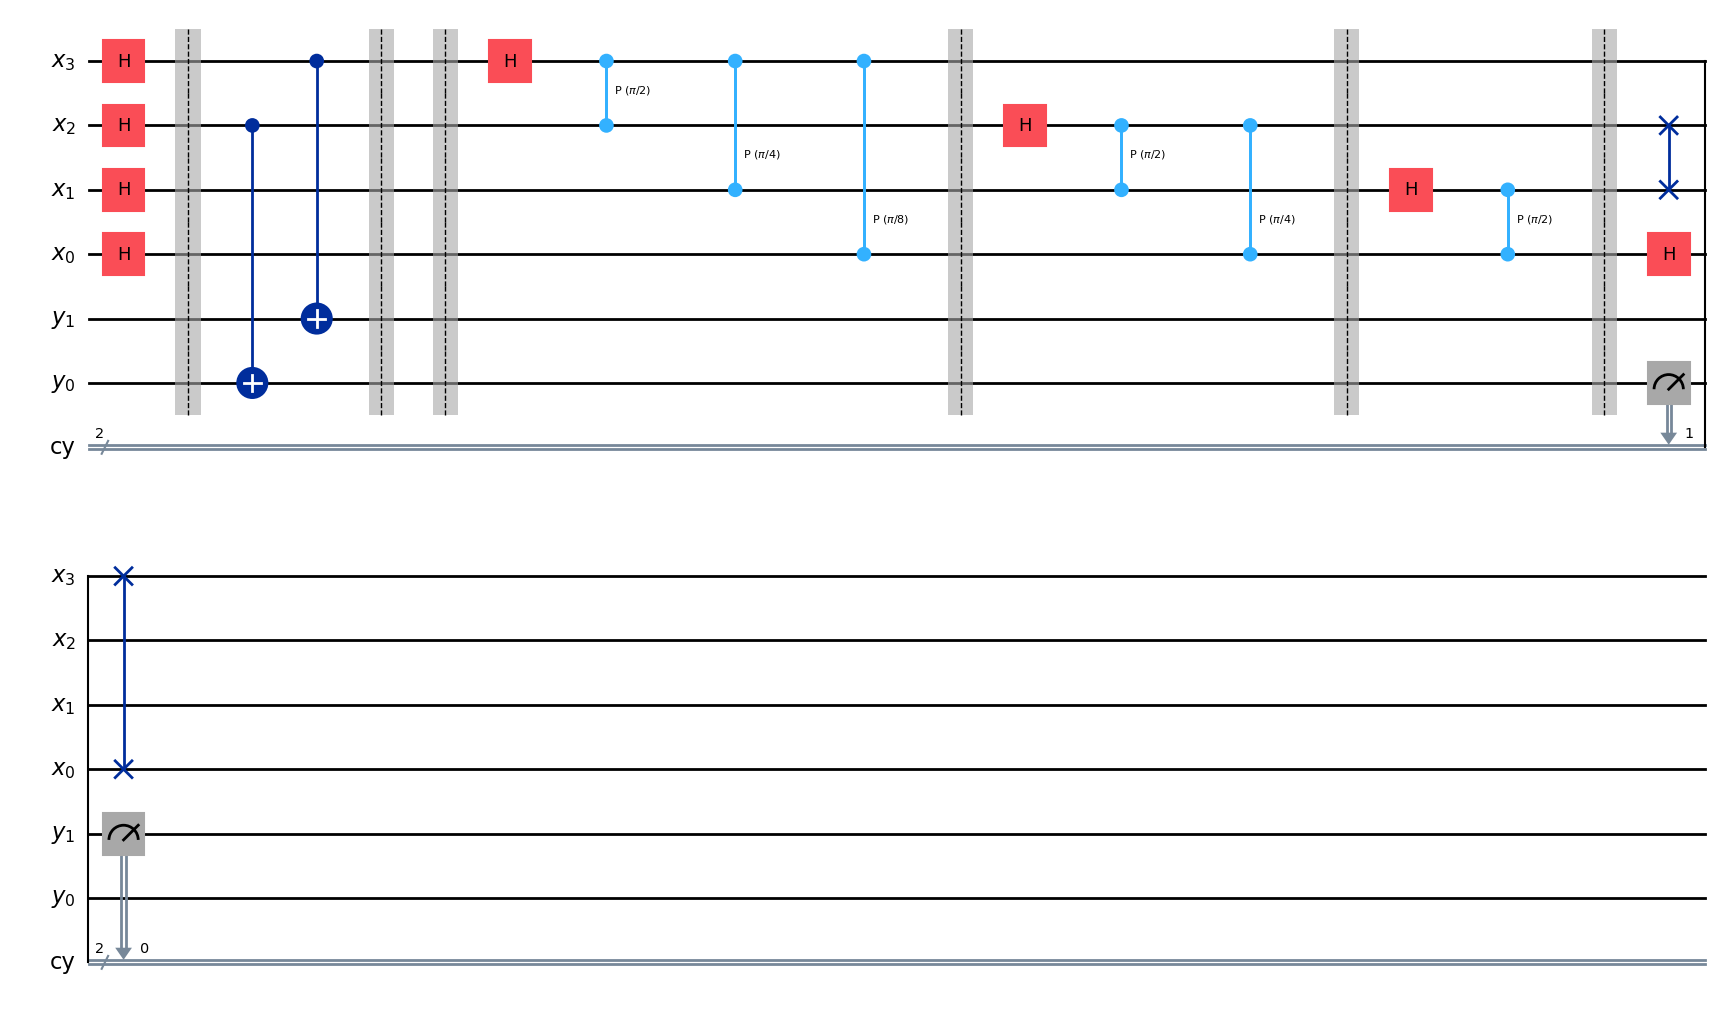

In [135]:

num_qubits = 4
iterator = [2**n for n in range(2, 5)]

def oracle(qc):
    qc.barrier()
    qc.cx(4, 0)
    qc.cx(5, 1)
    qc.barrier()


def circuit():
    num_x = 4
    num_y = 2
    iterator = [2**n for n in range(2, 5)]

    qcx = QuantumRegister(num_x, "x")
    qcy = QuantumRegister(num_y, "y")
    # clx = ClassicalRegister(num_x, "cx")
    cly = ClassicalRegister(num_y, "cy")
    qc = QuantumCircuit(qcy, qcx, cly)


    qc.h(range(num_y, num_x+num_y))
    oracle(qc)

    qft(qc, num_qubits, iterator, 2)

    
    # Y
    qc.measure(0, 1) # y_1
    qc.measure(1, 0) # y_0

    return qc

qc = circuit()

qc.draw("mpl", reverse_bits=True)

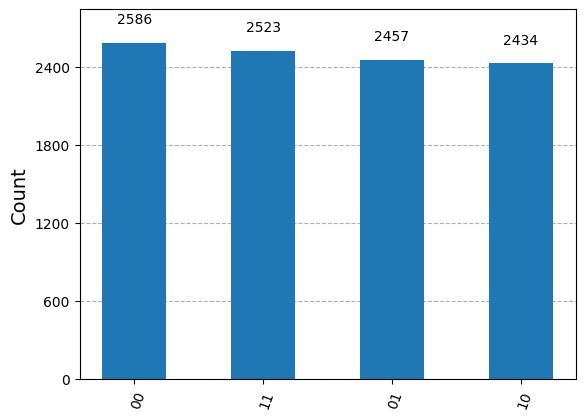

In [136]:
# Measure the qubits

sim = AerSimulator()
result = sim.run(qc, shots=10000).result()
plot_histogram(result.get_counts(), sort="value_desc")

- c) As an intermediate result, you should get x ∈ {0,4,8,12} according to QFT. Calculate the period of f from
this.

$$
x ∈ {0,4,8,12} \\
0+4 = 4 \\
4+4 = 8 \\
8+4 = 12 \\
... \\
$$

=> period is $4$

## Task 8.2 Simon’s Algorithm

- a) Determine whether the function f(x) is bijective or whether there is a vector s that fulfills the above property.
Which vector s would that be?

$f(x) = f(x') \rightarrow \text{not bijective}$

$s=(1 1 0)_2$

- b) Recreate Simon’s algorithm with the circuit for Uf in a simulator of your choice

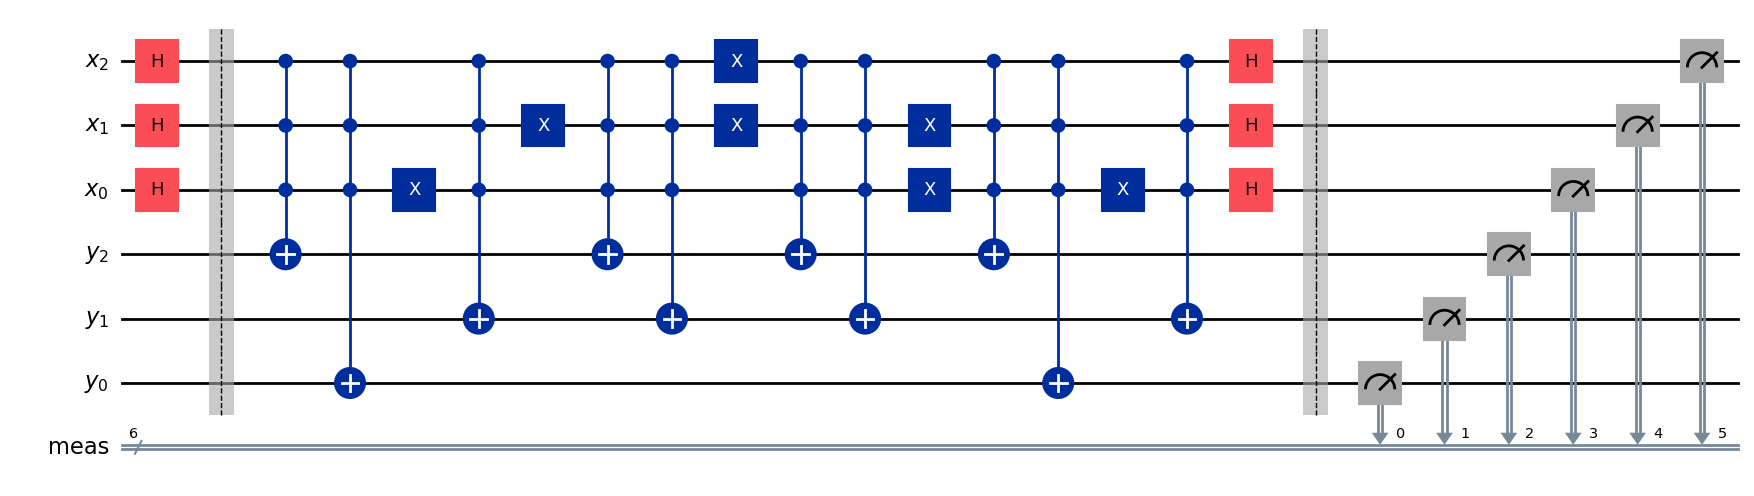

In [187]:

num_qubits = 4
iterator = [2**n for n in range(2, 5)]

def oracle(qc):
    qc.barrier()
    qc.mcx([3, 4, 5], 2)
    qc.mcx([3, 4, 5], 0)
    qc.x(3)
    qc.mcx([3, 4, 5], 1)
    qc.x(4)
    qc.mcx([3, 4, 5], 2)
    qc.mcx([3, 4, 5], 1)
    qc.x(5)
    qc.x(4)
    qc.mcx([3, 4, 5], 2)
    qc.mcx([3, 4, 5], 1)
    qc.x(3)
    qc.x(4)
    qc.mcx([3, 4, 5], 2)
    qc.mcx([3, 4, 5], 0)
    qc.x(3)
    qc.mcx([3, 4, 5], 1)



def circuit():
    num_x = 3
    num_y = 3

    qcx = QuantumRegister(num_x, "x")
    qcy = QuantumRegister(num_y, "y")
    qc = QuantumCircuit(qcy, qcx)


    qc.h(range(num_y, num_x+num_y))
    oracle(qc)
    qc.h(range(num_y, num_x+num_y))
    

    qc.measure_all()


    return qc

qc = circuit()

qc.draw("mpl", reverse_bits=True)

In [ ]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

display_statevector(statevector)

basis_states=['|000000)', '|000001)', '|000010)', '|000011)', '|000100)', '|000101)', '|000110)', '|000111)', '|001000)', '|001001)', '|001010)', '|001011)', '|001100)', '|001101)', '|001110)', '|001111)', '|010000)', '|010001)', '|010010)', '|010011)', '|010100)', '|010101)', '|010110)', '|010111)', '|011000)', '|011001)', '|011010)', '|011011)', '|011100)', '|011101)', '|011110)', '|011111)', '|100000)', '|100001)', '|100010)', '|100011)', '|100100)', '|100101)', '|100110)', '|100111)', '|101000)', '|101001)', '|101010)', '|101011)', '|101100)', '|101101)', '|101110)', '|101111)', '|110000)', '|110001)', '|110010)', '|110011)', '|110100)', '|110101)', '|110110)', '|110111)', '|111000)', '|111001)', '|111010)', '|111011)', '|111100)', '|111101)', '|111110)', '|111111)']


'|110101)'

First Vector: |110>

In [200]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

display_statevector(statevector)

basis_states=['|000000)', '|000001)', '|000010)', '|000011)', '|000100)', '|000101)', '|000110)', '|000111)', '|001000)', '|001001)', '|001010)', '|001011)', '|001100)', '|001101)', '|001110)', '|001111)', '|010000)', '|010001)', '|010010)', '|010011)', '|010100)', '|010101)', '|010110)', '|010111)', '|011000)', '|011001)', '|011010)', '|011011)', '|011100)', '|011101)', '|011110)', '|011111)', '|100000)', '|100001)', '|100010)', '|100011)', '|100100)', '|100101)', '|100110)', '|100111)', '|101000)', '|101001)', '|101010)', '|101011)', '|101100)', '|101101)', '|101110)', '|101111)', '|110000)', '|110001)', '|110010)', '|110011)', '|110100)', '|110101)', '|110110)', '|110111)', '|111000)', '|111001)', '|111010)', '|111011)', '|111100)', '|111101)', '|111110)', '|111111)']


'|001000)'

Second Vector: |001>

The result is fullfiling the conditions:

$a = {a_2, a_1, a_0} \text{ from } {0,1}_n with a  \neq 000 \text{ at the register } |x⟩$

- c) Now solve the linear system of equations by inserting the two measured linearly independent vectors:

d) Explain the result by analyzing the states |ψ2⟩ and |ψ4⟩ in particular.

Considering,
$$|\psi_2\rangle=\frac{1}{\sqrt{M}}\sum_{x=0}^{M-1}|x\rangle\left|f(x)\right\rangle $$

This means that register |x⟩ is in a superposition over all possible inputs, and is entangled with
|y⟩ = |f(x)⟩, which is therefore in a superposition over the possible results.


and

$$|\psi_4\rangle=\frac{1}{\sqrt{r}}\sum_{j=0}^{r-1}\left|j\cdot\frac{M}{r}\right\rangle $$

The verctors we've got all were resulting in 0 when solving the linear system of equations. Thus, the period can be calculated from them. 
> Since $M$ is known and $\gcd(M,j\cdotp\frac Mr)=\frac Mr$ applies, $r=\frac{M}{\gcd(M,j\cdot\frac{M}{r})}\text{ c}$ can be calculated.

We could calculate the frequency (not asked).